In [1]:
    import pandas as pd
    dataSalary = pd.read_csv("salary_data.csv").dropna()
    dataSalary

,farm,date,day_start,day_end,lunch_break,smoko,hours_done,hourly_rate
0,wayne_thomas,18/02/2023,06:00,16:00,01:00,00:15,08:45,26.7
1,wayne_thomas,20/02/2023,06:00,15:30,01:00,00:15,08:15,26.7
2,wayne_thomas,21/02/2023,06:00,16:30,01:00,00:15,09:15,26.7
3,wayne_thomas,22/02/2023,06:00,15:30,01:00,00:15,08:15,26.7
4,wayne_thomas,23/02/2023,06:00,15:00,01:00,00:15,07:45,26.7
5,wayne_thomas,24/02/2023,06:30,14:00,01:00,00:15,06:15,26.7
6,robert_and_channon_wineyard,27/02/2023,05:45,10:45,0,00:30,04:30,26.7
7,robert_and_channon_wineyard,28/02/2023,05:45,11:00,0,00:30,04:45,26.7
8,robert_and_channon_wineyard,03/03/2023,05:45,10:40,0,00:30,04:25,26.7
9,robert_and_channon_wineyard,04/03/2023,05:45,12:20,0,00:30,06:05,26.7


<Axes: xlabel='date'>

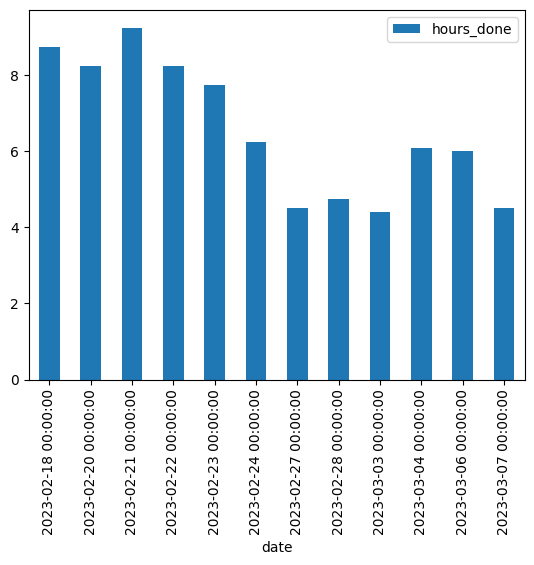

In [2]:
###############################################################################
# HEURES TRAVAIL EFFECTUEES PAR JOUR
###############################################################################

import pandas as pd
import matplotlib as pld
import datetime as dt

def time_string_to_decimals(time_string): 
    time_string=str(time_string)
    fields = time_string.split(":") 
    hours = fields[0] if len(fields) > 0 else 0.0 
    minutes = fields[1] if len(fields) > 1 else 0.0 
    seconds = fields[2] if len(fields) > 2 else 0.0 
    return float(hours) + (float(minutes) / 60.0) + (float(seconds) / pow(60.0, 2))

dataSalary = pd.read_csv("salary_data.csv").dropna()
dataSalary['date'] = pd.to_datetime(dataSalary['date'], format='%d/%m/%Y',errors = 'coerce')
dataSalary['hours_done'] = pd.to_datetime(dataSalary['hours_done'], format='%H:%M',errors = 'coerce').dt.time
dataSalary['hours_done'] = dataSalary['hours_done'].apply(time_string_to_decimals)                                                     
 
dataSalary.plot(kind='bar',x="date", y="hours_done")


<Axes: xlabel='date'>

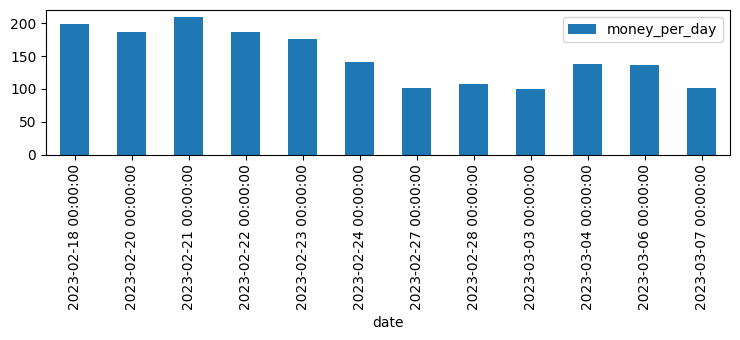

In [184]:
###############################################################################
# $ GAGNES PAR JOUR
###############################################################################
taxesFactor = 0.85 
supperAnnuationFactor = 1
dataSalary['money_per_day'] = dataSalary['hours_done'] * dataSalary['hourly_rate'] * taxesFactor * supperAnnuationFactor 
dataSalary
dataSalary.plot(kind='bar',x="date", y="money_per_day")


In [3]:
# extract_doc_info.py

from PyPDF2 import PdfFileReader
pdf_path = "PaySlip_230313_230319_HYFLO.pdf"
def extract_information(pdf_path):
    with open(pdf_path, 'rb') as f:
        pdf = PdfFileReader(f)
        information = pdf.getDocumentInfo()
        number_of_pages = pdf.getNumPages()

    txt = f"""
    Information about {pdf_path}: 

    Author: {information.author}
    Creator: {information.creator}
    Producer: {information.producer}
    Subject: {information.subject}
    Title: {information.title}
    Number of pages: {number_of_pages}
    """

    print(txt)
    return information

if __name__ == '__main__':
    path = 'reportlab-sample.pdf'
    extract_information(path)

FileNotFoundError: [Errno 2] No such file or directory: 'reportlab-sample.pdf'

In [35]:
from pdfreader import SimplePDFViewer
fd = open("PaySlip_230320_230326_HYFLO.pdf", "rb")
viewer = SimplePDFViewer(fd)
viewer.render()
#viewer.canvas.strings
markdown = viewer.canvas.text_content
with open("example-crash-markdown.txt", "w") as f:
      f.write(markdown)
netPay = markdown.split('(Net Pay *)', 1)[1].split('(', 1)[1].split(')',1)[0]
netPay

IndexError: list index out of range

In [57]:
import pdfreader
def extract_text_from_pdf(pdf_file_path):
 #   try:
        # Open the PDF file in binary read mode
        with open(pdf_file_path, 'rb') as pdf_file:
            # Create a SimplePDFViewer object
            viewer = SimplePDFViewer(pdf_file)

            # Initialize a variable to store the extracted text
            extracted_text = ''

            # Iterate through each page of the PDF file
            for canvas in viewer:
                # Extract the text from the canvas
                extracted_text += canvas.text_content

            return extracted_text

  #  except ParserError:
  #      print('Error: Failed to parse the PDF file')
  #      return None
    
extracted_text = extract_text_from_pdf('PaySlip_230320_230326_HYFLO.pdf')
print(extracted_text)


 BT
 ET
 q
 BT
/F0 0.1 Tf
0 Tc
0 Tw
 ET
 Q
 q
 BT
/F1 12 Tf
1 0 0 1 103.94 666.45 Tm
14.83 TL
0.01 Tw
0.001 Tc
[(Anthony) -0.08333334 ( Sauvage)] TJ
 ET
 Q
 q
 BT
/F1 12 Tf
1 0 0 1 103.94 651.62 Tm
14.83 TL
0.01 Tw
0.001 Tc
[(283) -0.08333334 ( Granite) -0.08333334 ( Belt) -0.08333334 ( Drive)] TJ
 ET
 Q
 q
 BT
/F1 12 Tf
1 0 0 1 103.94 636.79 Tm
14.83 TL
0.01 Tw
0.001 Tc
[(Thulimbah) -0.08333334 ( QLD) -0.08333334 ( 4376)] TJ
 ET
 Q
0.9490196 g
0.9490196 G
0.01 w
415.4332 730.1 155.5668 96.9 re
 B
 q
 BT
/F2 10 Tf
0 g
1 0 0 1 427.4332 807 Tm
15 TL
0.01 Tw
0.001 Tc
[(PAID) -0.1 ( BY)] TJ
 ET
 Q
 q
 BT
/F1 10 Tf
0 g
1 0 0 1 427.4332 792 Tm
15 TL
0.01 Tw
0.001 Tc
[(Hyflo) -0.1 ( Pty) -0.1 ( Ltd)] TJ
 ET
 Q
 q
 BT
/F1 10 Tf
0 g
1 0 0 1 427.4332 777 Tm
15 TL
0.01 Tw
0.001 Tc
[(378) -0.1 ( Church) -0.1 ( Rd)] TJ
 ET
 Q
 q
 BT
/F1 10 Tf
0 g
1 0 0 1 427.4332 762 Tm
15 TL
0.01 Tw
0.001 Tc
[(THE) -0.1 ( SUMMIT) -0.1 ( QLD) -0.1 ( 4377)] TJ
 ET
 Q
 q
 BT
/F1 10 Tf
0 g
1 0 0 1 427.4332 747 Tm
15 